---
---
Problem Set 8: Visualization

Applied Data Science using Python

New York University, Abu Dhabi

Out: 02nd Nov 2023 || **Due: 9th Nov 2023 at 23:59**

---
---
#Start Here
## Learning Goals
### General Goals
- Learn to visualize data using different Python packages

### Specific Goals
- Learn to visualize data using Matplotlib
- Learn to visualize data using Seaborn
- Learn to visualize data using Pandas
- Understand differences between different visualization packages
- Learn to visualize continuous variables
- Learn to visualize discrete variables

## Collaboration Policy
- You are allowed to talk with / work with other students on homework assignments.
- You can share ideas but not code, analyses or results; you must submit your own code and results. All submitted code will be compared against all code submitted this and previous semesters and online using MOSS. We will also critically analyze the similarities in the submitted reports, methodologies, and results, **but we will not police you**. We expect you all to be mature and responsible enough to finish your work with full integrity.
- You are expected to comply with the [University Policy on Academic Integrity and Plagiarism](https://www.nyu.edu/about/policies-guidelines-compliance/policies-and-guidelines/academic-integrity-for-students-at-nyu.html). Violations may result in penalties, such as failure in a particular assignment.

## Late Submission Policy
You can submit the homework for upto 3 late days. However, we will deduct **20 points** from your homework grade **for each late day you take**. We will not accept the homework after 3 late days.

## Distribution of Class Materials
These problem sets and recitations are intellectual property of NYUAD, and we request the students to **not** distribute them or their solutions to other students who have not signed up for this class, and/or intend to sign up in the future. We also request you don't post these problem sets, and recitations online or on any public platforms.

## Disclaimer
The number of points do not necessarily signify/correlate to the difficulty level of the tasks.

## Submission
You will submit all your code as a Python Notebook through [Brightspace](https://brightspace.nyu.edu/) as **P8_YOUR NETID.ipynb**.

---




# General Instructions
This homework is worth 100 points. It has 3 parts. Below each part, we provide a set of concepts required to complete that part. All the parts need to be completed in this Jupyter (Colab) Notebook.



### Importing necessary libraries

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Man is to Doctor as Woman is to Nurse?

Two of the renowned researchers, **Matthew Plotnikov Libbins**, and **Seamus Bornhauser** came together to publish a paper titled "*Revealing Inherent Gender Biases in Using Word Embeddings for Sentiment Analysis*".

What is *Sentiment Analysis*? What are *Word Embeddings*?

In short, **sentiment analysis** is a natural language processing technique that is used to determine if a given piece of text is "positive", "negative", or "neutral".

Furthermore, **word embeddings** or **word vectors** are a way to represent words in a meaningful way to conduct text or natural language processing. In other words, given a bunch of words, a machine learning model is used to create a mathematical representation of words which is then used for many downstream tasks such as sentiment analysis.

The aforementioned paper highlights how different machine learning models of **word embeddings** accumulate model- and data-dependent gender biases which can affect the effectiveness and robustness of sentiment analysis.

Lucky for you, we have gotten an exclusive preprint of the paper for you to read, enjoy, and draw inspiration for. Wuhoo! :) <sup>1</sup>

Your task in this problem set is to first read the paper we have provided you in its entirety, and then recreate the visualizations in this paper. It is very important that you read the paper before attempting the visualizations so you don't waste time bruteforcing.

There are 5 figures in the paper, out of which you would need to recreate only 2. These would be *figure 4*, and *figure 5* in the paper.

**Your visualizations/plots should exactly match the specifications and the visual cues provided provided in the paper.**

Good luck!

------------------
<sup>1. This is a work of fiction. The characters, names, writing, data, and visualizations depicted in this problem set are mostly ficticious. Any similarity to actual persons, living or dead, or to actual papers, is purely coincidental or inspirational. This paper and visualizations may, but do not necessarily indicate the best ways of preparing and visualizing data. They are prepared for the sole purpose of teaching the Python visualization tools.</sup>

## Part I: Visualizing Words (25 points)

Write your code for the reconstruction of figure 4 below.

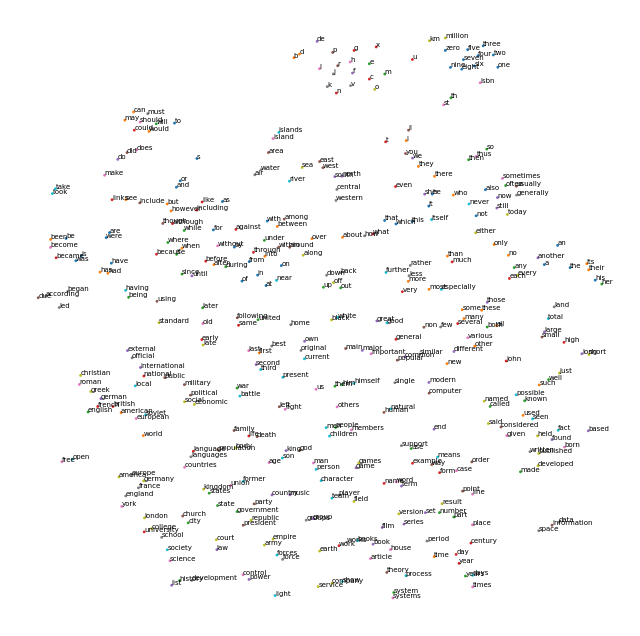

In [8]:
# Write your implementation for figure 4 below
########## SOLUTION ##############
# Import data
df = pd.read_csv("word_vectors.csv") # Please adjust path accordingly


# Create a figure with a single subplot
plt.figure(figsize=(8, 8))

# Use the tab10 colormap to add colors to the scatter plot points
colormap = cm.get_cmap('tab10', len(df['word']))
# Get a list mapping each word to a color (required format for plt.scatter)
colors = [colormap(i) for i in range(len(df['word']))]

# Create a scatter plot using matplotlib with dimension1 on the x-axis and dimension2 on the y-axis
scatter_plot = plt.scatter(
    x=df['dimension1'],
    y=df['dimension2'],
    s=1,
    c=colors
)

# Annotate each point with the corresponding word
for i, txt in enumerate(df['word']):
    plt.annotate(
        text=txt,
        xy=(df['dimension1'][i], df['dimension2'][i]),
        xytext=(df['dimension1'][i], df['dimension2'][i]),
        fontsize=5
    )

# Remove the axis labels and frame
plt.axis('off')

# Finally, draw the plot
plt.show()
######## SOLUTION END #############

### Rubric

+ +10 points for plotting the basic word visualization
+ +10 points for meeting style specifications exactly as shown
+ +5 points for properly commenting all steps

### *Concepts required to complete this tasks*

*   Basics of Matplotlib

## Part II: Uncovering Bias (60 points)

Write your code for the reconstruction of figure 5 below.

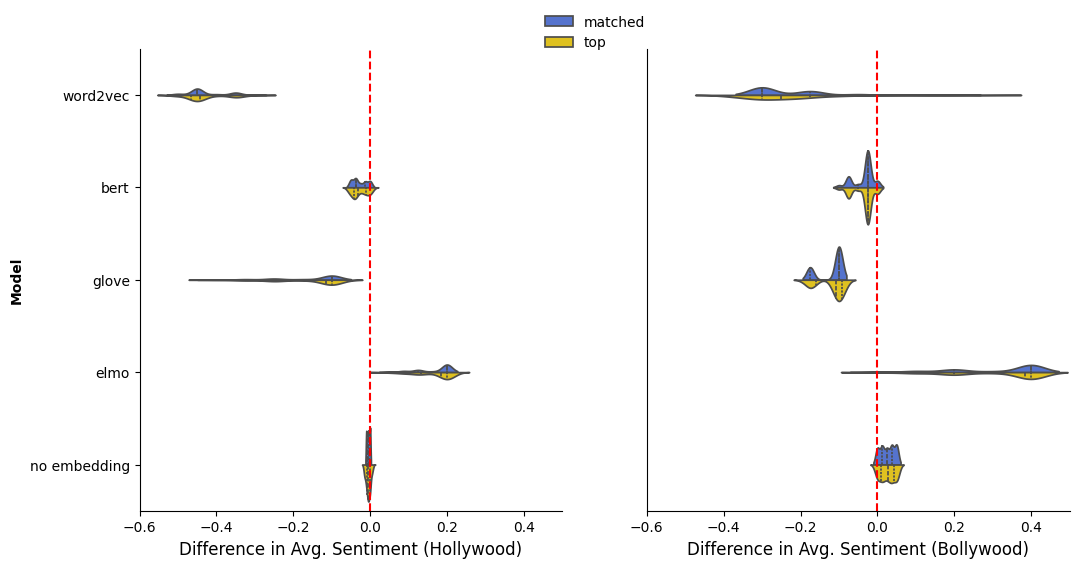

In [9]:
# Write your implementation for figure 5 below

########## SOLUTION ##############
# Import data
df = pd.read_csv("word_embeddings_bias_handout.csv")  # Please adjust path accordingly

# Calculate difference in sentiment
df['difference'] = df['female_name_average_sentiment'] - df['male_name_average_sentiment']

# Create two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Function to generate violin (sub)plots
def generate_violin_plot(ax, industry):
    # Remove top and right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Define colors for violin plot categories
    colors = {"matched": "royalblue", "top": "gold"}
    
    # Generate violin plot
    sns.violinplot(
        x='difference', y='model', 
        hue='names_compared', palette=colors,
        data=df[df['industry']==industry],
        split=True, inner="quartile",
        ax=ax
        )
    
    # Add dotted vertical line at 0
    ax.axvline(0, color='red', linestyle='--')
    
    # Edit x-axis limits
    ax.set_xlim(-0.5, 0.5)
    # Setting the x-axis ticks and labels
    ax.set_xticks([-0.6, -0.4, -0.2, 0, 0.2, 0.4])
    # Edit x-axis labels
    ax.set_xlabel(f'Difference in Avg. Sentiment ({industry.capitalize()})', fontsize=12)
    
    # Make y-axis label bold and uppercase
    ax.set_ylabel(ax.get_ylabel().title(), fontweight='bold')
    
    # Place our legend approximately where it appears in the reference figure
    ax.legend(loc='upper left', bbox_to_anchor=(-0.27, 1.1))
    
    # From legend, remove the title and the legend box frame
    ax.legend_.set_title('')
    ax.legend_.set_frame_on(False)

# Violin plot for Hollywood
generate_violin_plot(ax1, "hollywood")
# Violin plot for Bollywood
generate_violin_plot(ax2, "bollywood")

# Remove y-labels from the second subplot
ax2.set_ylabel('')
# Remove y-ticks from the second subplot
ax2.set_yticks([])
# Remove legend from the first subplot (due to the positioning of the legend in the second subplot)
ax1.legend_.remove()

plt.show()

######## SOLUTION END #############

### Rubric

- +45 points for creating the correct visualization as shown
- +10 points for styling exactly as per specifications and visual cues
- +5 points for properly commenting and explaining your approach

### *Concepts required to complete this tasks*

*   Basics of Matplotlib
*   Basics of Seaborn

## Part III: Additions (15 points)

Now that you have read the paper, and plotted the visualizations, what did you think was missing from the analysis and more importantly from the visualizations?

Was there anything that was unclear or intentionally or unintentionally hidden from the visualizations? Were the principles of visualization followed? Were the visualizations sufficient? Were they the right choices for the information being presented? If you had to make a few changes to the figure 5, what would those be? If you had to add a plot to the paper, what would that be? These are just some of the rhetorical questions that you may need to think about for this task. You don't have to answer them, but thinking about these questions will help us accomplish this task.

Keeping the above questions in mind, in this part, we would like you to either:

- Add a new plot given the data that is available to you and the information/context in the paper, OR

- Make non-stylistic modification(s) to the figure in part 1 to add more information to it or think of a better way to visualize it, OR

- Make non-stylistic modification(s) to the figure in part 2 to add more information to it or think of a better way to visualize it.

Whichever you choose to attempt, justify your choice in fewer than 10 sentences (preferably as bullet points) as to why that was a necessary amendment.

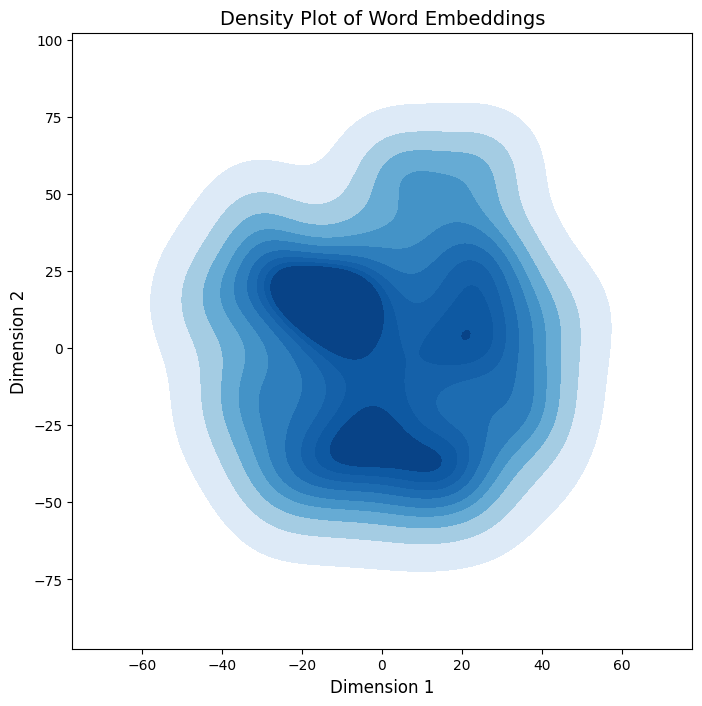

In [10]:
# Write your implementation for part 3 here

########## SOLUTION ##############
# Import the data
df = pd.read_csv("word_vectors.csv")  # Adjust the path accordingly

# Set up the figure
plt.figure(figsize=(8, 8))

# Generate a density plot (KDE) using seaborn
sns.kdeplot(data=df, x='dimension1', y='dimension2', cmap='Blues', fill=True)

# Set axis labels
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)


# Add a title
plt.title('Density Plot of Word Embeddings', fontsize=14)

# Remove the axis labels to match the original visualization
# plt.axis('off')

# Show the plot
plt.show()

######## SOLUTION END #############

**Why this plot?**

Our use of the density plot for the word embeddings provides the following advantages:

- **Highlighting Density**: Unlike scatter plots, a density plot visually emphasizes regions with a high concentration of points, highlighting the areas where words are densely packed in the embedding space.
- **Clarity**: It avoids overplotting, where individual points may overlap and obscure the data, thus providing a clearer representation of the data distribution.
- **Discovering Patterns**: The gradients of color in a density plot can reveal underlying patterns or trends that might not be immediately apparent in a scatter plot.
- **Intuitive Interpretation**: For those not familiar with t-SNE plots, density plots can be more intuitive, showing 'hotspots' of word similarity without the need to understand the specifics of the dimensionality reduction technique.

**Another Interesting idea**: Use k-means clustering to find clusters of words that are similar to each other and then visualize them in a 2D space.

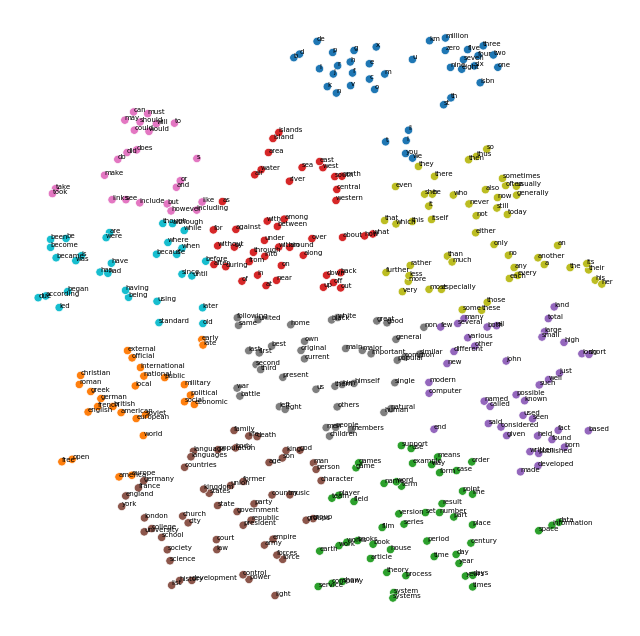

In [16]:
from sklearn.cluster import KMeans

# Clustering the data into 'n' clusters
n_clusters = 10  # Change based on your preference
kmeans = KMeans(n_clusters=n_clusters, n_init='auto').fit(df[['dimension1', 'dimension2']])
df['cluster'] = kmeans.labels_

# Scatter plot with colors indicating clusters
plt.figure(figsize=(8, 8))
sns.scatterplot(data=df, x='dimension1', y='dimension2', hue='cluster', palette="tab10", legend=False)

# Annotate each point with the corresponding word
for i, txt in enumerate(df['word']):
    plt.annotate(
        text=txt,
        xy=(df['dimension1'][i], df['dimension2'][i]),
        xytext=(df['dimension1'][i], df['dimension2'][i]),
        fontsize=5
    )

plt.axis('off')
plt.show()

**Justification**: K-Means is a useful machine learning algorithm that can enable us to cluster our words into different regions based on their embeddings. These word clusterings can then be used in conjunction with NLP techniques such as tokenization, lemmatization, and stemming to predict which clusters a word can potentially belong to. This can, in turn, be used to determine the sentiment of a word based on the sentiment of the words in the same cluster.

That being said, there are certain limitations to this idea. The k-means algorithm might not create the most robust clusters. Also, words in different clusters may convey different sentiments. But overall, this is a good idea to explore.

### Rubric

- +10 points for a significant addition/modification to a visualization in the paper -- one that is necessary to better understand, and does not increase redundancy.
- +5 points for clearly justifying your addition/modification

### *Concepts required to complete this tasks*

*   Basics of Matplotlib
*   Basics of Seaborn
*   Optionally Visualization Principles



